# Diszkrét dinamikai rendszerek és különös attraktorok

Tegyük fel, hogy adott egy $f:\mathbb{R}^n\to\mathbb{R}^n$ leképezés. Tetszőleges $x_0\in\mathbb{R}^n$ kezdőértéket választva tekinthetjük $f$ iteráltjainak egy $x_0, f(x_0), f(f(x_0)),\ldots$ sorozatát, melynek tagjai általánosságban az
$$
x_{n+1} = f(x_n)
$$
rekurzióval adhatók meg.

Amennyiben az $n\in\mathbb{N}$ paramétert időként interpretáljuk, szokás a fenti rekurziót (autonóm) *diszkrét dinamikai rendszernek* nevezni. Az $x_0, x_1, x_2,\ldots$ sorozatot pedig a dinamikai $x_0\in\mathbb{R}^n$ kezdőértékhez tartozó *trajektóriájának* hívjuk.

Vezessük be a $\Phi:\mathbb{N}\times\mathbb{R}^n\to\mathbb{R}^n$ *fázisfolyam leképezést* $\Phi (n, x_0):=x_n$. A fázisfolyam leképezés lényegében az "időléptetést" írja le, és könnyen meggondolható, hogy teljesíti a
$$
\Phi (n, \Phi(m, x_0)) = \Phi (n+m, x_0)
$$
félcsoport tulajdonságot.

A különböző pontokból kiinduló trajektóriák hosszútávú viselkedését figyelve előfordulhat, hogy azok a kezdőérték választásától nagy mértékben függetlenül a fázistér egy $A\subset\mathbb{R}^n$ részhalmazába futnak be, az $A$-ból induló trajektóriák pedig egyáltalán nem hagyják el az $A$ halmazt. Az ilyen minimális invariáns határhalmazt *attraktor*-nak nevezzük. A szabatos definíció a következő:
\begin{definition}
A fázistér egy $A\subset\mathbb{R}^n$ részhalmazát **attraktor**-nak nevezzük, ha
* invariáns halmaz, azaz $f(A)\subset A$ teljesül;
* megadható az $A$ halmaznak egy olyan $B(A)$ környezete, melyre igaz, hogy $A$ tetszőleges $B'$ környezetét véve és tetszőéeges $x_0\in B(A)$ kezdőértéket választva
$$
\left|\{x_n\mid n\in\mathbb{N}\}\setminus B'\right|<\infty,
$$
azaz az $x_0$-ból induló trajektória előbb-utóbb $B'$-be ér és ott is marad örökre.
* az $A$ halmaz minimális olyan értelemben, hogy nincs olyan nem üres, valódi részhalmaza $A$-nak, mely a fenti két tulajdonságot teljesíti.
\end{definition}

Topológiailag szemlélve az attraktorok lehetnek fixpontok, vagy véges számú pont, melyet a fázisvektor időről időre bejár; folytonos időben határciklus (magasabb dimenzióban határtórusz), vagy (akár diszkrét esetben is) ún. *különös attraktor*, mely fraktál tulajdonságot mutat. 

## A Logisztikus leképezés

A $\mu\in (0,1)$ paraméter tetszőleges rögzített értéke mellett az $f(x)=4\mu x(1-x)$ hozzárendelés egy $f:(0,1)\to (0,1)$ függvényt ad meg, melyet *logisztikus leképezésnek nevezünk*. A következőkben egy rögzített $x_0\in (0,1)$ pontból kiindulva az $f$ függvény iteráltjainak, más szóval az 
$$x_{n+1} = f(x_n)$$ 
rekurzióval adott *diszkrét dinamikai rendszer*-nek a hosszútávú viselkedését tanulmányozzuk. 

Látni fogjuk, hogy a $\mu$ paramétert akár csak kis mértékben változtatva, az attraktor halmaz drámaian megváltozik. Ezt a jelenséget *bifurkációnak* nevezzük. 

Elsőként a logisztikus leképezés bifurkációs diagrammját szimuláljuk, ahol a visszintes tengelyen $\mu$ értéke szerepel, és a függőleges metszetek az egyes $\mu$ értékekhez tartozó attraktorokat ábrázolják. 

In [55]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, mu: 4.0*mu*x*(1-x)  # a logisztikus leképezés

def iterate(mu, x0):
    """
    Ezzel a generátorral egy x0 pontból kiindulva, 
    tetszőleges mu értéket rögzítve tudunk iteráltakat számolni.
    """
    
    x = x0*np.ones_like(mu)
    
    while True:
        yield x        
        x = f(x, mu)
                
def trajectory(mu, x0, N):
    """
    N hosszú trajektóriákat ad vissza.
    """
    
    x = iterate(mu, x0)
    
    return np.array([next(x) for k in range(N)])

def BifurcationDiagram(x0, nTransient, nCycle, muArray, plot=True):
    """
    Bifurkációs diagramm rajzolása:
    muArray minden eleméhez számol egy trajektóriát úgy, hogy először
    nTransient lépést tesz, amikor is elér egy ún. attraktort, majd
    nCycle pontban kirajzolja az attraktort.
    """
    
    x = trajectory(muArray, x0, nTransient+nCycle)  # teljes trajektória
    x = x[nTransient:] # a tranzienseket elhagyjuk
    
    if plot:
        _, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.plot(muArray, x.T,'k,')
        
    return x.T

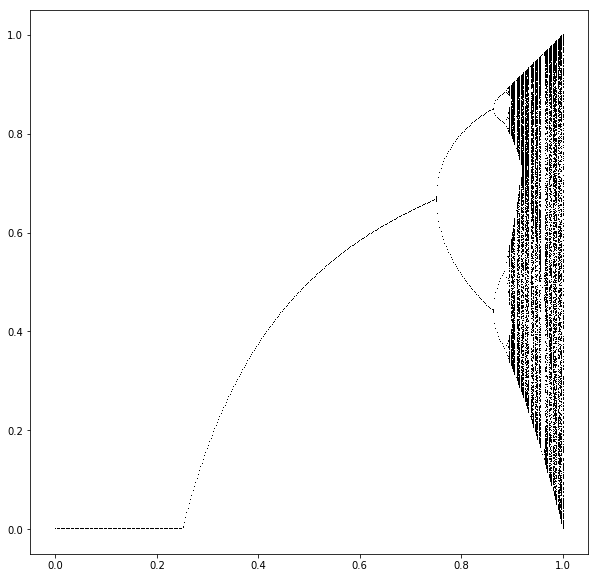

In [61]:
x0 = 0.1
nTransient = 500
nCycle = 500

# Teszteljük le az alábbi szcenáriókat.

muArray = np.linspace(0., 1.0, 400)
# muArray = np.linspace(0.85, 1.0, 400)  # ránagyítunk
# muArray = np.linspace(0.96, 0.97, 400) # mégjobban kinagyítjuk

# tapasztalat: az attraktor önhasonló

BifurcationDiagram(x0, nTransient, nCycle, muArray);

## Invariáns mérték

Azt mondjuk, hogy egy $\nu:\mathcal{B}((0,1))\to [0,1]$ valószínűségi Borel mérték invariáns az $f:(0,1)\to (0,1)$ leképezésre nézve, ha
$$
(f_*\nu) (A) = \nu \left(\stackrel{-1}{f}(A)\right) = \nu (A)
$$
teljesül.

**Feladat:** Ellenőrizzük, hogy a $\nu (d x)=\frac{1}{\pi \sqrt{x(1-x)}}dx$ invariáns az $f(x)=4x(1-x)$ logisztikus leképezésre nézve (A $\nu$ mértéket arcsin-law-nak is nevezik. Valyon miért?).

**Feladat:** Nem minden esetben van invariáns mérték. Tudunk olyat mondani, amikor nincs? Mi a helyzet, ha az attraktor véges sok pontból áll?

**Feladat:** Gondoljuk meg, hogy a korábbi leckék során felbukkant Liouville-tétel fő állítása éppen az, hogy Hamilton rendszerekben maga a Lebesgue mérték az invariáns mérték.

Az $f$ leképezés a $\nu$ invariáns mértékkel egy $((0,1),\mathcal{B}((0,1)),\nu,f)$ dinamikai rendszert ad meg, melyet *ergodikusnak* mondunk, ha az invariáns halmazok valószínűsége csak $0$ vagy $1$ lehet.

Az ergodikus leképezések fő motivációja Birkhoff ergod tétele, mely szerint ergodikus dinamikai rendszerekben teljesül, hogy
$$
\frac{1}{n}\sum_{k=0}^{n-1} \phi (x_k)\to \int_{[0,1]}\phi (x) \nu\, (d x),\,\,\,\,n\to\infty,\,\,\phi\in L_\nu^1.
$$

Ebből azonnal kiolvasható, hogy az ergodikus rendszer az összes idejének akkora hányadát tölti egy halmazban, amekkora a halmaz invariáns valószínűség szerinti mértéke. A statisztikus fizikusok ezt többnyire úgy mondják, hogy az "időátlag" és a "térátlag" megegyezik.

**Feladat:** Látunk hasonlóságot a nagy számok erős törvényével? Ha igen, akkor magyarázzuk is meg!

Bár a kutatók gyakran hangoztatják, hogy a tudomány reprodukálható jelenségekkel foglalkozik, számos jelenség egyszerűen természeténél fogva nem reprodukálható. Próbálta már valaki a világegyetem keletkezését reprodukálni?! Az ergodikus rendszerek gyakorlati jelentőségét éppen az adja, hogy egyetlen idősor megfigyeléséből következtetéseket tudunk levonni a rendszer átlagos viselkedésével kapcsolatban.

In [180]:
def density_histogram(sample: np.array, nbins: int):
    """
    A sample vektor sűrűséghisztogramját állítja elő a [0,1] intervallumon.
    Sajnos a numpy verzió BUG-os, ezért saját kellett.
    """
    
    hist = np.array([np.sum((k/nbins<=sample) & (sample<(k+1)/nbins)) for k in range(nbins)])
    hist = nbins*hist/sample.size
    
    return hist

def empirical_density(mu: float, n: int):
    """
    Az invariáns mérték sűrűség hisztogramjának becslése. 
    """
    
    x0 = 0.1  # mindegy honnan indítjuk
    nTransient = 500    # először ennyit iterálunk, hogy biztosan elérjük az attraktort
    nPoints = int(n**3) # ennyi mintát veszünk az attraktorból
    
    x = iterate(mu, x0)
    
    for i in range(nTransient):
        next(x);
        
    sample = np.array([next(x) for j in range(nPoints)])

    density = density_histogram(sample, nbins=n)
    
    # density, _ = np.histogram(sample, bins=n, density=True)  # sajnos a numpy beépített histogram függvénye BUG-os
    
    return density

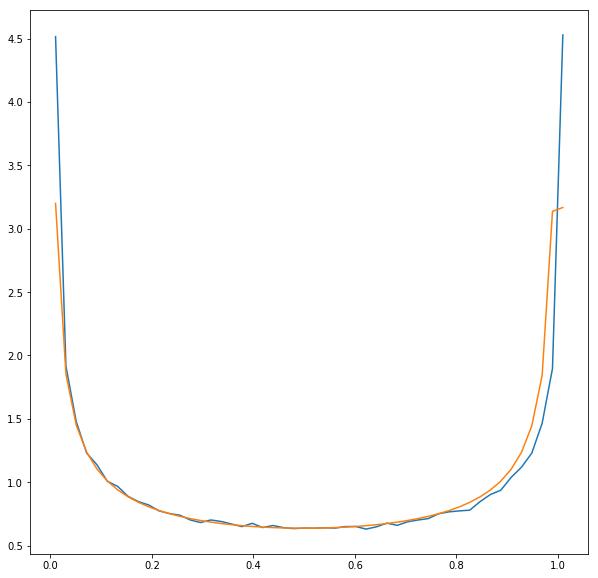

In [179]:
import matplotlib.pyplot as plt

n = 50

# Próbáljuk ki az alábbi beállításokat!
# mu = 0.8  # az attraktor egy periodikus pálya
# mu = 0.9  # itt különös attraktorral van dolgunk, mely két diszjunkt intervallumot tölt ki
mu = 1.0    # a különös attraktor az egész [0,1]-ot kitölti, a rendszer ergodikus

# mu = 0.892486418  # Feigenbaum attraktor: különös, önhasonló, dimenziója 0 és 1 közötti (lásd következő pont)

t = np.linspace(0.0, 1.0, n) + 0.5/n

law = lambda t: 1.0/(np.pi*np.sqrt(np.abs(t*(1-t))))  # arcsin törvény
density = empirical_density(mu, n)  # empirikus sűrűség

_, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(t, density)
ax.plot(t, law(t))

## Fraktál dimenzió-k számítása különös attraktorokra

### Kapacitás dimenzió

Legyen $A\subset \mathbb{R}^d$ egy tetszőleges halmaz. Tegyük fel, hogy az $A$ halmazt $\varepsilon$ élhosszúságú zárt kockákkal fedtük be, és a fedéshez $N$ kockát használtunk fel. Ha az $A$ halmaz $V(A)$ térfogata valahogyan értelmezhető, akkor biztosan igaz, hogy legalább
$$
N\ge V/\varepsilon^d
$$
kockát kellett használnunk. Mindkét oldal logaritmusát véve (kicsit nem precíz módon) kapjuk, hogy
$$
\log N \approx \log V -d\log\varepsilon.
$$

Ez az összefüggés motiválja a kapacitás dimenzió (Minkowski-Bouligand dimenzió) fogalmát:
$$
D_{cap} = -\lim_{\varepsilon\to 0}\frac{\log N}{\log \varepsilon}.
$$

Ezt közvetlenül tudjuk számolni a sűrűség hisztogramból, ahol $N$ a nem üres cellák számát jelöli, és $\varepsilon$ egy cella élhosszúsága. 

### Információs dimenzió 

Ezt a dimenzió fogalamat Rényi Alfréd vezette be 1959-ben véletlen vektorok (pontfelhők) dimenziójának a mérésére. A kapacitás dimenzióval ellentétben az egyes cellákat a "meglepetés értékükkel" súlyozza:
$$
D_{inf} = \lim_{\varepsilon\to 0}\frac{\sum P_j\log P_j}{\log \varepsilon}.
$$

Az alábbiakban a $\mu$ bifurkációs paraméter függvényében kiszámítjuk az attraktor kapacitás és információs dimenzióját.

In [190]:
log = lambda x: np.ma.log(x).filled(0.0)  # log (0)-t 0-nak definiáljuk (információelméletben bevett trükk)

def cap_dim(mu: float):
    """
    Kapacitás dimenzió
    """
    
    n = 50
    
    h = empirical_density(mu, n)
    
    # calculate number of non-empty cells
    N = np.sum(h>0.0)
    
    Dcap = np.log(N)/np.log(n)
    
    return Dcap
    
def inf_dim(mu: float):
    """
    Információs dimenzió
    """
    
    n = 50
    
    # valószínűségi súlyfüggvények
    P = empirical_density(mu, n)/n
    
    # információk
    I = np.sum(P*log(P))
    
    Dinf = - I/np.log(n)
    
    return Dinf 

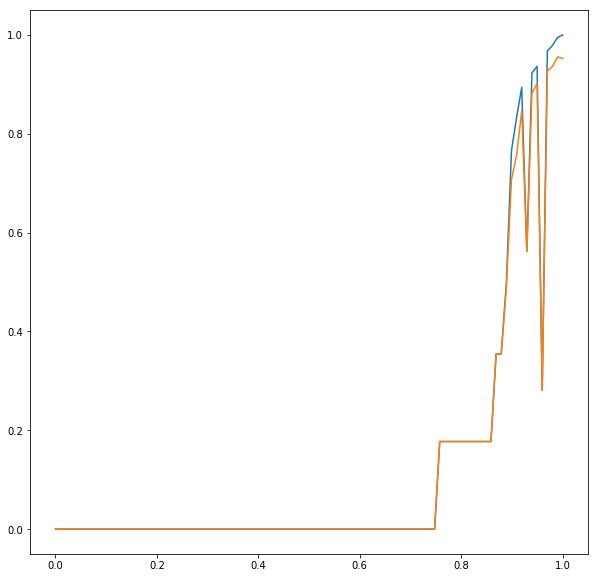

In [192]:
mu = np.linspace(0.0, 1.0, 100)

Dcap = np.array([cap_dim(y) for y in mu])
Dinf = np.array([inf_dim(y) for y in mu])

_, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(mu, Dcap)
ax.plot(mu, Dinf)

# mu-->1 átmenetben 1-hez tart

## Feladat: Lyapunov-exponens

A logisztikus dinamikai rendszer nem csak különös attraktorairól híres, hanem kaotikus viselkedéséről is (lásd pillangóhatás). Ez alatt azt értjük, hogy egymáshoz nagyon közeli kezdeti értékekből indított trajektóriák rendkívül gyorsan távolodnak egymástól. Ezt hívjuk kaotikus viselkedésnek. Tehát noha elméletben a rendszer determinisztikus, nem tudjuk a távoli jövőjét tetszőleges pontossággal kiszámítani már csak a kezdeti érték numerikus számábrázolás okozta bizonytalansága miatt sem.

A Lyapunov-exponens a trajektóriák távolodási sebességét méri. Folytonos dinamikai rendszerek esetén ha $|\delta x(t)|$ méri két trajektória távolságát a $t$ időpontban, akkor durván szólva igaz, hogy létezik olyan $\lambda>0$ szám, melyre
$$
|\delta x(t)|\approx e^{\lambda t}|\delta x(0)|,
$$
azaz a trajektóriák exponenciális sebességgel távolodnak és a Lyapunov-exponens nem más mint a kitevőben lévő $\lambda$ faktor. Természetesen nem mindegy, hogy a két kezdeti érték milyen irányban tér el egymástól. A kezdeti értékek közti függvényében kapható maximális $\lambda$ rátát maximális Lyapunov exponensnek nevezzük.

Ennek jelentősége az, hogy két kezdeti érték tipikusan olyan irányban tér el egymástól, mely tartalmaz a maximális Lyapunov-exponenshez tartozó komponenst, így hosszú idő után a legnagyobb kitevőjű exponenciális növekedés válik dominánssá.

Szerencsére diszkrét dinamikai rendszerekre a maximális Lyapunov-exponenst könnyű kiszámítani:
$$
\lambda (x_0)=\lim_{n\to\infty}\frac{1}{n}\sum_{k=0}^{n-1} \log |f'(x_k)|.
$$

**Feladat:** Írjunk programot a logisztikus rendszer maximális Lyapunov-exponensének kiszámítására. Ábrázoljuk a Lyapunov-exponenst mint az $x_0$ paraméter függvényét.

# További kapcsolódó feladatok

Keressünk érdekes kaotikus diszkrét idejű dinamikai rendszereket és futtassuk le a fenti numerikus szimulációkat (bifurkációs diagram, invariáns mérték, attraktor dimenziója, Lyapunov-exponens, stb.). 

# Takens tétele és alkalmazásai

A gyakorlati alkalmazások szempontjából rendkívül fontos kérdés az, hogy mérési eredményekből megismerhető-e az attraktor. Ezt a kérdést járta körül Floris Takens a turbulens áramlással kapcsolatos kutatásai során. Eredményei rámutatnak arra, tipikusan igaz, hogy az attraktor topológia jellemzői skalár-értékű mérések segítségével meghatározhatók.

**1. Feladat:**
A http://www.scholarpedia.org/article/Attractor_reconstruction cikk elolvasása, az olvasottak összefoglalása kiselőadás formájában.

**2. Feladat:**
Sugihara japán kutató Takens tételére alapozva dolgozta ki a konvergens keresztleképezések módszerét, mellyel valódi ok-okozati kapcsolatok mutathatók ki idősorok között. A feladat Sugihara eredeti https://deepeco.ucsd.edu/wp-content/uploads/2019/10/causalityCCM.pdf cikkének elolvasása és tartalmi összefoglalása kiselőadás formájában.

**3. Feladat:**
A https://skccm.readthedocs.io/en/latest/quick-example.html Python csomag Takens-tétellek, késleltetett beágyazással és konvergens keresztleképezésekkel kapcsolatos algoritmusok implementációit tartalmazza. A feladat a "Quick Example" fejezetben szereplő kódok lefuttatása és ismertetése. Ez a 2. Feladatban szereplő cikkben bemutattott csatolt logisztikus rendszer szimulációja.

# További olvasnivalók

1. https://cac.cornell.edu/myers/teaching/ComputationalMethods/ComputerExercises/Bifurcation/Bifurcation.html

2. https://en.wikipedia.org/wiki/Attractor

3. https://en.wikipedia.org/wiki/Strange_nonchaotic_attractor (nem kaotikus különös attraktor, ilyen is van!)

4. https://en.wikipedia.org/wiki/Chaos_theory

5. https://en.wikipedia.org/wiki/Lyapunov_exponent

6. https://en.wikipedia.org/wiki/Hurst_exponent

7. https://www.stat.cmu.edu/~cshalizi/754/2006/notes/solutions-2.pdf

8. https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension